# KMean Clustering

### Import Libraries

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
import pandas as pd

### Read the data

In [59]:
customer_df = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

In [60]:
# Check for null values
customer_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Observation**: There is no missing values in the columns.

In [62]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Spending Score (1-100)')

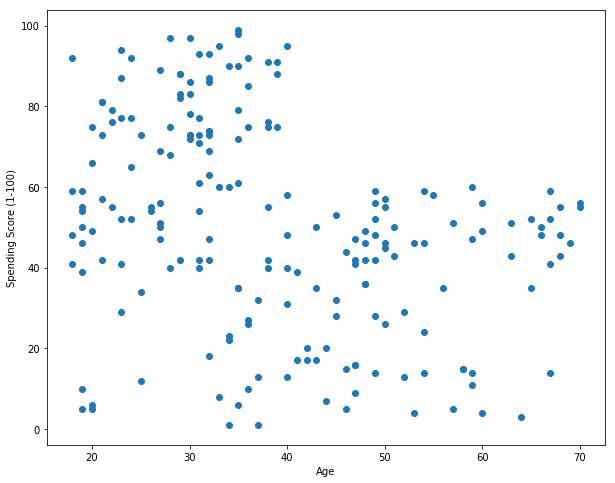

In [63]:
plt.scatter(customer_df["Age"], 
            customer_df["Spending Score (1-100)"])

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Text(0, 0.5, 'Annual Income (k$)')

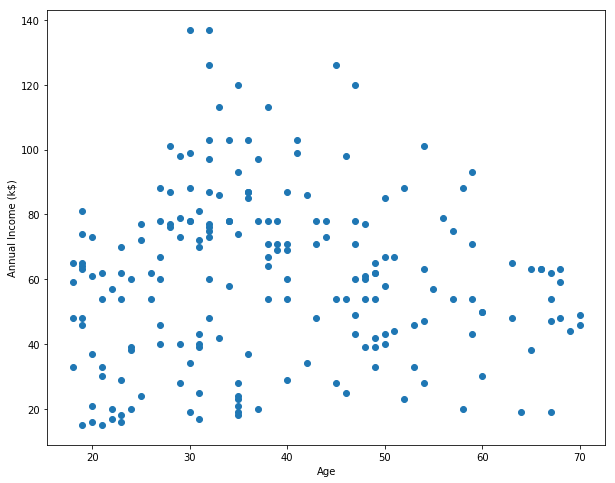

In [64]:
plt.scatter(customer_df["Age"], 
            customer_df["Annual Income (k$)"])

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

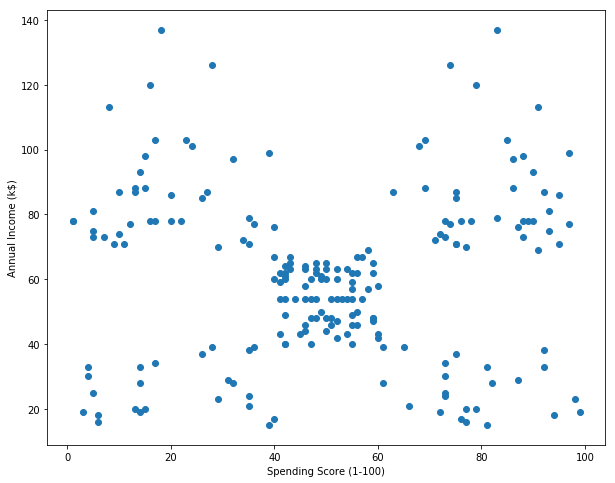

In [65]:
plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"])

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

### Choose relevant columns

In [67]:
relevant_cols = ["Age", "Annual Income (k$)", 
                 "Spending Score (1-100)"]

customer_df = customer_df[relevant_cols]

In [68]:
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Data Transformation

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(customer_df)

scaled_data = scaler.transform(customer_df)

In [71]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

### Determine the best number of cluster

In [72]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values


def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

In [73]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

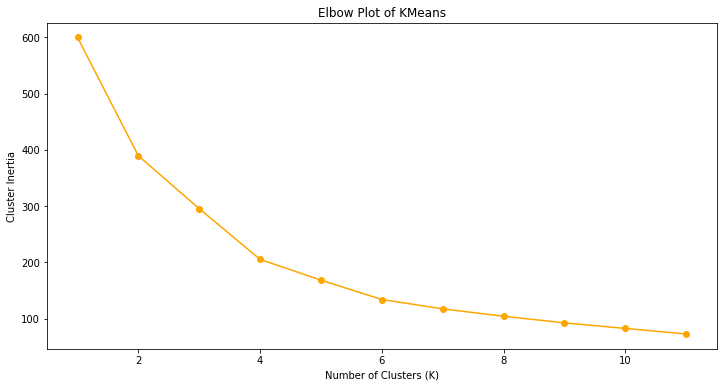

In [74]:
generate_elbow_plot(clusters_centers, k_values)

### Create the final KMeans model

In [75]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
customer_df["clusters"] = kmeans_model.labels_

In [83]:
customer_df

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,3
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,0
197,32,126,74,2
198,32,137,18,0


In [93]:
customer_df.count()

Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
clusters                  200
dtype: int64

In [92]:
# SELECT Age, clusters
# FROM customer_df
# GROUP BY clusters
# ORDER BY Age;

cust_df_clusters = customer_df.groupby("clusters")["clusters"].count()
cust_df_clusters

clusters
0    39
1    47
2    40
3    54
4    20
Name: clusters, dtype: int64

Text(0, 0.5, 'Spending Score')

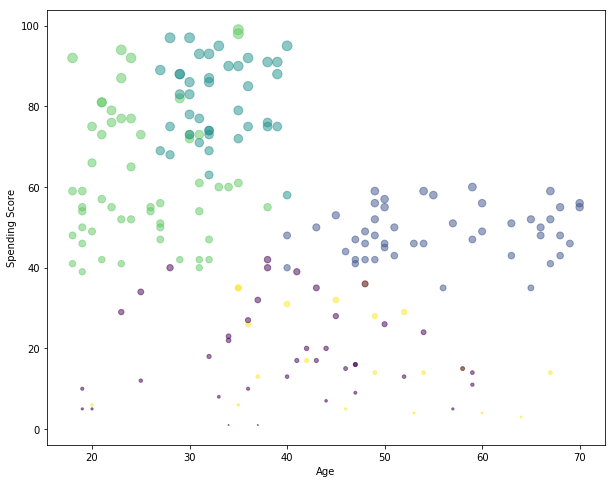

In [104]:
plt.scatter(customer_df["Age"], customer_df["Spending Score (1-100)"], 
            c = customer_df["clusters"], s=customer_df["Spending Score (1-100)"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Spending Score")

### Visualize the clusters

Text(0, 0.5, 'Annual Income')

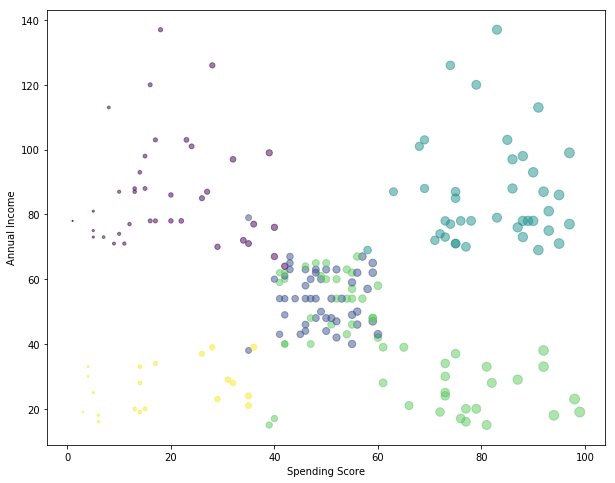

In [103]:
plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"], 
            c = customer_df["clusters"], 
            s=customer_df["Spending Score (1-100)"], alpha=0.5)
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")

In [82]:
import seaborn as sns
cust_df = customer_df.groupby("Annual Income (k$)")['Annual Income (k$)'].sum()
cust_df_2 = customer_df.groupby("Spending Score (1-100)")['Spending Score (1-100)'].sum()
cust_df_2

Spending Score (1-100)
1       2
3       3
4       8
5      20
6      12
     ... 
94     94
95    190
97    194
98     98
99     99
Name: Spending Score (1-100), Length: 84, dtype: int64